### Figure MF-Phys 

original draft of code: SOZONE/windAnalyis/oceanFields/bargraph-streamlined-2.ipynb




In [84]:
import xarray as xr

In [85]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [86]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [87]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [88]:

scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


In [89]:
baseDir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/'

mld_ukesm_1A = xr.open_dataset(f'{baseDir}/extracted-summary/somxl010_ukesm_1A.nc')
mld_ukesm_1B = xr.open_dataset(f'{baseDir}/extracted-summary/somxl010_ukesm_1B.nc')
mld_ukesm_2A = xr.open_dataset(f'{baseDir}/extracted-summary/somxl010_ukesm_2A.nc')
mld_ukesm_2B = xr.open_dataset(f'{baseDir}/extracted-summary/somxl010_ukesm_2B.nc')
mld_ukesm_3A = xr.open_dataset(f'{baseDir}/extracted-summary/somxl010_ukesm_3A.nc')
mld_ukesm_3B = xr.open_dataset(f'{baseDir}/extracted-summary/somxl010_ukesm_3B.nc')


sst_ukesm_1A = xr.open_dataset(f'{baseDir}/extracted-summary/SST_ukesm_1A.nc')
sst_ukesm_1B = xr.open_dataset(f'{baseDir}/extracted-summary/SST_ukesm_1B.nc')
sst_ukesm_2A = xr.open_dataset(f'{baseDir}/extracted-summary/SST_ukesm_2A.nc')
sst_ukesm_2B = xr.open_dataset(f'{baseDir}/extracted-summary/SST_ukesm_2B.nc')
sst_ukesm_3A = xr.open_dataset(f'{baseDir}/extracted-summary/SST_ukesm_3A.nc')
sst_ukesm_3B = xr.open_dataset(f'{baseDir}/extracted-summary/SST_ukesm_3B.nc')

Cflx_ukesm_1A = xr.open_dataset(f'{baseDir}/extracted-summary/CflxTS_ukesm_1A_SO.nc')
Cflx_ukesm_1B = xr.open_dataset(f'{baseDir}/extracted-summary/CflxTS_ukesm_1B_SO.nc')
Cflx_ukesm_2A = xr.open_dataset(f'{baseDir}/extracted-summary/CflxTS_ukesm_2A_SO.nc')
Cflx_ukesm_2B = xr.open_dataset(f'{baseDir}/extracted-summary/CflxTS_ukesm_2B_SO.nc')
Cflx_ukesm_3A = xr.open_dataset(f'{baseDir}/extracted-summary/CflxTS_ukesm_3A_SO.nc')
Cflx_ukesm_3B = xr.open_dataset(f'{baseDir}/extracted-summary/CflxTS_ukesm_3B_SO.nc')

In [90]:
# sst_ukesm_1A = xr.open_dataset(f'{baseDir}/extracted-summary/SST_ukesm_1A.nc')
# sst_ukesm_1B = xr.open_dataset(f'{baseDir}/extracted-summary/SST_ukesm_1B.nc')

# mld_ukesm_1A = xr.open_dataset(f'{baseDir}/extracted-summary/somxl010_ukesm_1A.nc')
# mld_ukesm_1B = xr.open_dataset(f'{baseDir}/extracted-summary/somxl010_ukesm_1B.nc')

# Cflx_ukesm_1A = xr.open_dataset(f'{baseDir}/extracted-summary/CflxTS_ukesm_1A_SO.nc')
# Cflx_ukesm_1B = xr.open_dataset(f'{baseDir}/extracted-summary/CflxTS_ukesm_1B_SO.nc')

def make_yearlist(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT_s50/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_ukesm_1A = xr.open_mfdataset(make_yearlist(1950,2099,'1A'))
ot_ukesm_2A = xr.open_mfdataset(make_yearlist(1950,2099,'2A'))

In [91]:
def get_effect_ozone(sc1,sc2,dec1=1950, dec2=2090,var = 'wspd10m', seas = 'FY'):

    ##for warming just have 
    sc = sc1 - sc2
    
    if seas == 'FY':
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        
    else:
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01'))
        start = start.sel(time_counter=(start['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
        
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01'))
        end = end.sel(time_counter=(end['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
    
    effect1 = end-start # the better one i think 
    effect2 = end
    
    return effect1, effect2

def get_effect_warming(sc1,dec1=1950, dec2=2090,var = 'wspd10m', seas = 'FY'):

    ##for warming just have 
    sc = sc1
    
    if seas == 'FY':
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values

    else:
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01'))
        start = start.sel(time_counter=(start['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
        
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01'))
        end = end.sel(time_counter=(end['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
    
    effect1 = end-start # the better one i think 
    effect2 = end
    
    return effect1, effect2

## OT

In [92]:
def make_yearlist_tom(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}-TOMA7.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_tom_1A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1A'))
ot_tom_2A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2A'))
ot_tom_3A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3A'))
ot_tom_1B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1B'))
ot_tom_2B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2B'))
ot_tom_3B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3B'))

def make_yearlist(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT_s50/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_ukesm_1A = xr.open_mfdataset(make_yearlist(1950,2099,'1A'))
ot_ukesm_2A = xr.open_mfdataset(make_yearlist(1950,2099,'2A'))
ot_ukesm_3A = xr.open_mfdataset(make_yearlist(1950,2099,'3A'))
ot_ukesm_1B = xr.open_mfdataset(make_yearlist(1950,2099,'1B'))
ot_ukesm_2B = xr.open_mfdataset(make_yearlist(1950,2099,'2B'))
ot_ukesm_3B = xr.open_mfdataset(make_yearlist(1950,2099,'3B'))

In [93]:
wspdset_sst = [sst_ukesm_1A, sst_ukesm_1B, sst_ukesm_2A, sst_ukesm_2B, sst_ukesm_3A, sst_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

sst_ukesm_2A_50 = sst_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
sst_ukesm_2B_50 = sst_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))


#var = 'somxl010'; vardesc = 'MLD'; ylab = 'm'
var = 'tos'; vardesc = 'sst'; ylab = 'deg C'

def plot_thing(wspdset,scens, var, ind = 0, var1 = var):
    for x in range(0,6):
        tsc = scens[x]
        wspd = wspdset[x]

        tv = wspd[var1].groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[0+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[1+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[2+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[3+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[4+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1)

## by season figure of SST, MLD, OT, and CO2

Text(0.5, 0.3, 'air-sea CO$_2$ sink, 1950-2100')

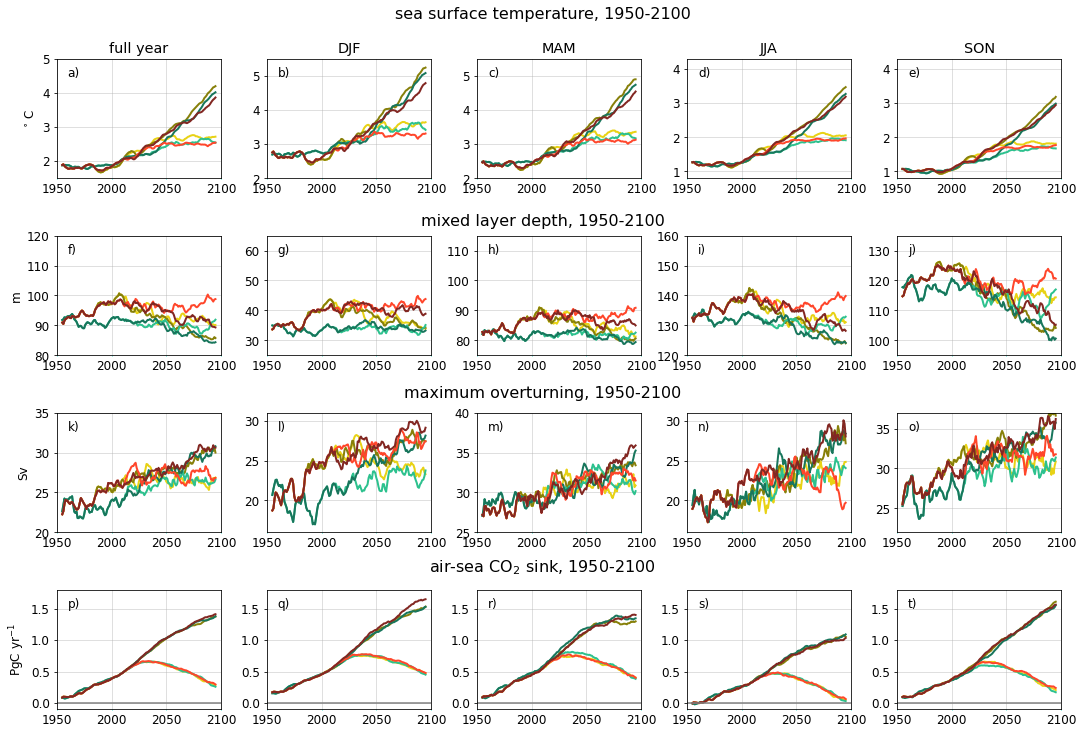

In [94]:
fact = 1
fig, axs = plt.subplots(4,5, figsize=(18*fact, 9*1.33*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
            'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']

cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
cols_t = ['dimgrey', 'silver']
scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
           'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']


############## lines
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])

wspdset_sst = [sst_ukesm_1A, sst_ukesm_1B, sst_ukesm_2A, sst_ukesm_2B, sst_ukesm_3A, sst_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']
plot_thing(wspdset_sst,scens, 'tos',ind = 0, var1 = 'tos')

wspdset_mld = [mld_ukesm_1A, mld_ukesm_1B, mld_ukesm_2A, mld_ukesm_2B, mld_ukesm_3A, mld_ukesm_3B]
plot_thing(wspdset_mld,scens, 'somxl010',ind = 5, var1 = 'somxl010')

wspdset_ot = [ot_ukesm_1A, ot_ukesm_1B, ot_ukesm_2A, ot_ukesm_2B, ot_ukesm_3A, ot_ukesm_3B]
#scens = ['1A', '1B', '2A', '2B', '3A', '3B']
plot_thing(wspdset_ot,scens, 'max_OT',ind = 10, var1 = 'max_OT_yr')

wspdset_cflx = [Cflx_ukesm_1A, Cflx_ukesm_1B, Cflx_ukesm_2A, Cflx_ukesm_2B, Cflx_ukesm_3A, Cflx_ukesm_3B]
plot_thing(wspdset_cflx,scens, 'Cflx',ind = 15, var1 = 'Cflx')

##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'wind speed, 1950-2100'
t2 = 'effect of ozone concentration changes on wind speed, 1950-2100'
t3 = 'effect of GHG emissions on wind speed, 1950-2100'
t4 = 'effect of ozone concentration changes and GHG emissions on wind speed, $\overline{2090-2100} - \overline{1950-1960}$'

fs = 16

for i in range(0,20):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,20):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
for i in range(1,20):
    axs[i].set_xlim([1950,2100])
    axs[i].set_ylabel('')
    
for i in range(0,20):
    #axs[i].set_xlim([1950,2100])
    #axs[i].set_ylabel('')
    axs[i].axhline(y=0, color = 'grey')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([1.5,2,2,0.8,0.8])  
hi = 3.5
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = np.array([80,25,75,120,95])  
hi = 40
for i in range(0,5):
    axs[i+5].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+5].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = np.array([20,16,25,16,22])  
hi = 15
for i in range(0,5):
    axs[i+10].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+10].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['p)','q)','r)','s)','t)']  
ymi = np.array([-0.1,-0.1,-0.1,-0.1,-0.1])
hi = 1.9
for i in range(0,5):
    axs[i+15].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+15].text(1960,ymi[i]+0.85*hi,lab[i])

tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])
    

plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'sea surface temperature, 1950-2100'
t2 = 'mixed layer depth, 1950-2100'
t3 = 'maximum overturning, 1950-2100'
t4 = 'air-sea CO$_2$ sink, 1950-2100'

axs[0].set_ylabel('$^{\circ}$ C')
axs[5].set_ylabel('m')
axs[10].set_ylabel('Sv')
axs[15].set_ylabel('PgC yr$^{-1}$')

fs = 16
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
os = 0.02
plt.figtext(0.5,0.94, t1, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.70, t2, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.50, t3, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")



In [99]:
def plot_thing_fyonly(wspdset,scens, var, ind = 0, var1 = var, lw = [2.5, 2.5, 1, 1, 1, 1], alpha = [2.5, 2.5, 1, 1, 1, 1]):
    for x in range(0,6):
        tsc = scens[x]
        wspd = wspdset[x]

        tv = wspd[var1].groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        tv_rol.plot(ax = axs[0+ind], color = scendict[tsc]['color'], \
                    linewidth = lw[x], linestyle = '-', alpha = alpha[x], label = scendict[tsc]['name2'])
        
        

ValueError: alpha (2.5) is outside 0-1 range

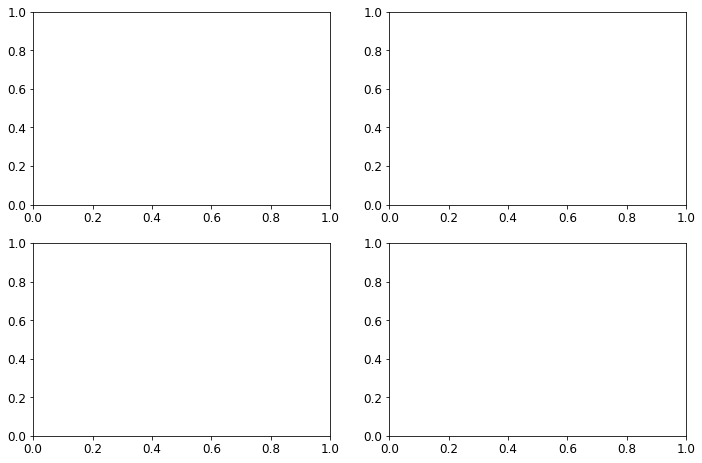

In [100]:

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

fact = 1.3
fig, axs = plt.subplots(2,2, figsize=(9*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
            'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']

cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
cols_t = ['dimgrey', 'silver']
scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
           'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']

############## lines

wspdset_sst = [sst_ukesm_1A, sst_ukesm_1B, sst_ukesm_2A, sst_ukesm_2B, sst_ukesm_3A, sst_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']
lwset = [2.5, 2.5, 1, 1, 1, 1]
alphaset = [2.5, 2.5, 1, 1, 1, 1]

plot_thing_fyonly(wspdset_sst,scens, 'tos',ind = 0, var1 = 'tos')

wspdset_mld = [mld_ukesm_1A, mld_ukesm_1B, mld_ukesm_2A, mld_ukesm_2B, mld_ukesm_3A, mld_ukesm_3B]
plot_thing_fyonly(wspdset_mld,scens, 'somxl010',ind = 1, var1 = 'somxl010')

wspdset_ot = [ot_ukesm_1A, ot_ukesm_1B, ot_ukesm_2A, ot_ukesm_2B, ot_ukesm_3A, ot_ukesm_3B]
plot_thing_fyonly(wspdset_ot,scens, 'max_OT',ind = 2, var1 = 'max_OT_yr')

wspdset_Cflx = [Cflx_ukesm_1A, Cflx_ukesm_1B, Cflx_ukesm_2A, Cflx_ukesm_2B, Cflx_ukesm_3A, Cflx_ukesm_3B]
plot_thing_fyonly(wspdset_Cflx,scens, 'Cflx',ind = 3, var1 = 'Cflx')


axs[0].set_xlabel('')
axs[0].set_ylabel('$^{\circ}$C')
axs[0].set_title('Sea Surface Temperature')
axs[1].set_xlabel('')
axs[1].set_ylabel('m')
axs[1].set_title('Mixed Layer Depth')
axs[2].set_ylabel('Sv')
axs[2].set_title('Maximum $\sigma$-coordinates Overturning Circulation')
axs[3].set_ylabel('Pg C yr$^{-1}$')
axs[3].set_title('air-sea CO$_2$ flux')


for i in range(0,4):
    axs[i].set_xlim([1950,2100])